#### Using SVM, check whether iPhone was purchased or not

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset

df = pd.read_csv('iphone_purchase_records.csv')
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
df.shape

(400, 4)

In [4]:
df.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [5]:
df['Purchase Iphone'].unique()

array([0, 1], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
df.Gender.describe()

count        400
unique         2
top       Female
freq         204
Name: Gender, dtype: object

<Axes: xlabel='Gender', ylabel='Count'>

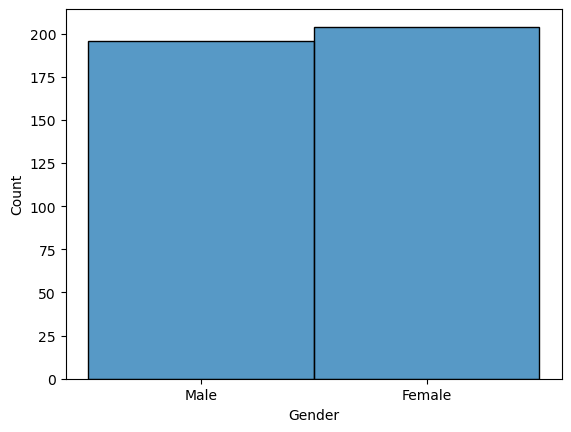

In [9]:
sns.histplot(df.Gender)

<Axes: xlabel='Age', ylabel='Count'>

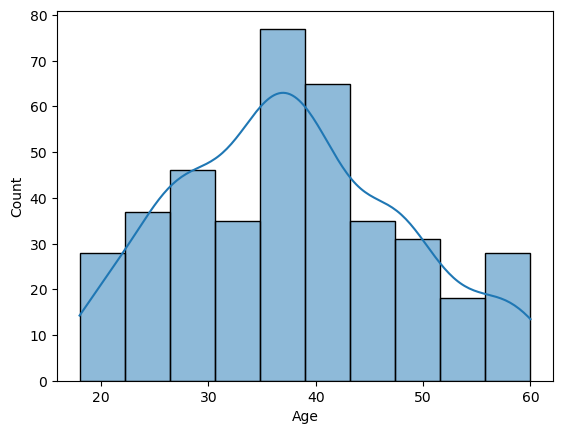

In [10]:
sns.histplot(df.Age, kde = True)

<Axes: >

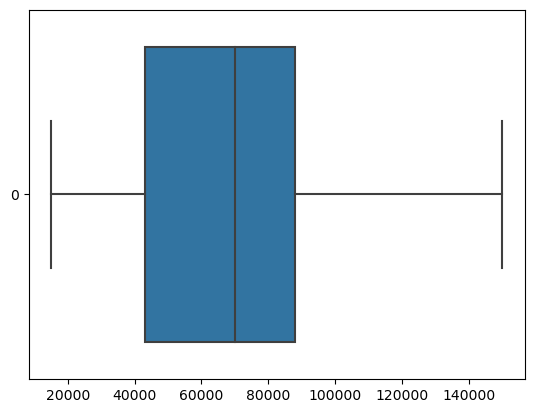

In [11]:
sns.boxplot(df.Salary, orient='h')

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
Gender_encoder = LabelEncoder()

In [14]:
df.Gender = Gender_encoder.fit_transform(df.Gender)
# Male = 1, Female = 0

In [15]:
df.Gender

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

In [16]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


C:\Users\srika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


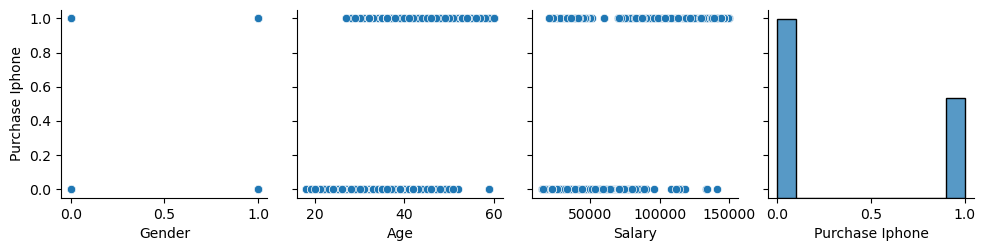

In [17]:
sns.pairplot(df, y_vars = 'Purchase Iphone' )

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
df_scaler = StandardScaler()

In [20]:
y = df['Purchase Iphone']

In [21]:
X = df.drop('Purchase Iphone', axis = 1)

In [22]:
X.shape

(400, 3)

In [23]:
y.shape

(400,)

In [24]:
X = df_scaler.fit_transform(X)

In [25]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 3)
(280,)
(120, 3)
(120,)


In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC()

In [31]:
svm_model.fit(X_train, y_train)

SVC()

In [32]:
y_pred = svm_model.predict(X_test)

#### Evaluation

In [33]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



In [35]:
print(confusion_matrix(y_test, y_pred))

[[68  5]
 [ 3 44]]


<Axes: >

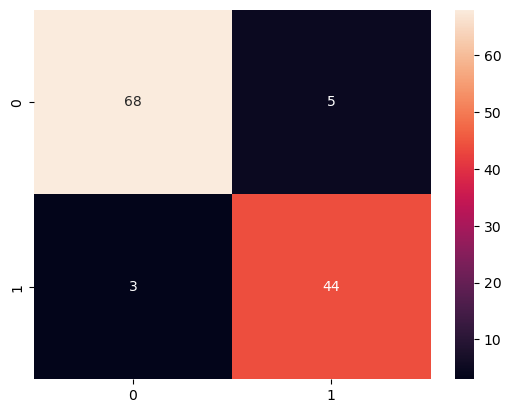

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

#### hyperparameter tuning using gridsearch

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'C':[0.1, 0.5, 1.0, 10, 100],
             'gamma':[10,1,0.1,0.001],
              'kernel':['rbf', 'linear']
             }

In [39]:
grid = GridSearchCV(SVC(), param_grid=param_grid, verbose=2, cv = 3, scoring='accuracy')

In [40]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0, 10, 100],
                         'gamma': [10, 1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [41]:
grid.best_params_

{'C': 1.0, 'gamma': 1, 'kernel': 'rbf'}

In [48]:
svm_tuned_model = SVC(C = 1, gamma=1)

In [49]:
svm_tuned_model.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [50]:
yt_pred = svm_tuned_model.predict(X_test)

In [51]:
accuracy_score(y_test, yt_pred)

0.9333333333333333

In [52]:
print(classification_report(y_test, yt_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



<Axes: >

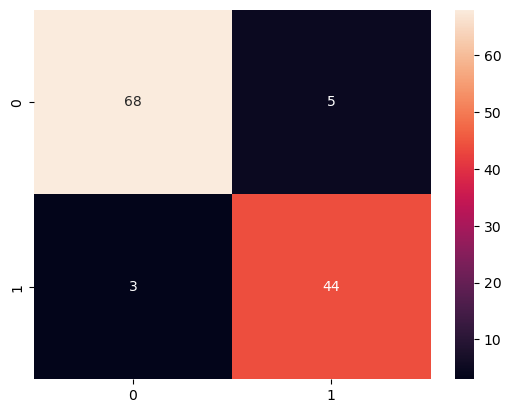

In [53]:
sns.heatmap(confusion_matrix(y_test, yt_pred), annot = True)

END